In [5]:
import numpy as np
import pandas as pd
import config_file
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,precision_recall_curve,classification_report
from sklearn.metrics import precision_recall_curve,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
import pickle
import json


In [6]:
dir(config_file)

['ARTIFACTS_FOLDER_PATH',
 'CSV_FILE_PATH',
 'PORT_NUMBER',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'model_file_path',
 'os']

In [7]:
csv_file_path = config_file.CSV_FILE_PATH
df = pd.read_csv(csv_file_path)
df

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             50             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3        150             66             23       94  28.1   
4        150             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   52        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


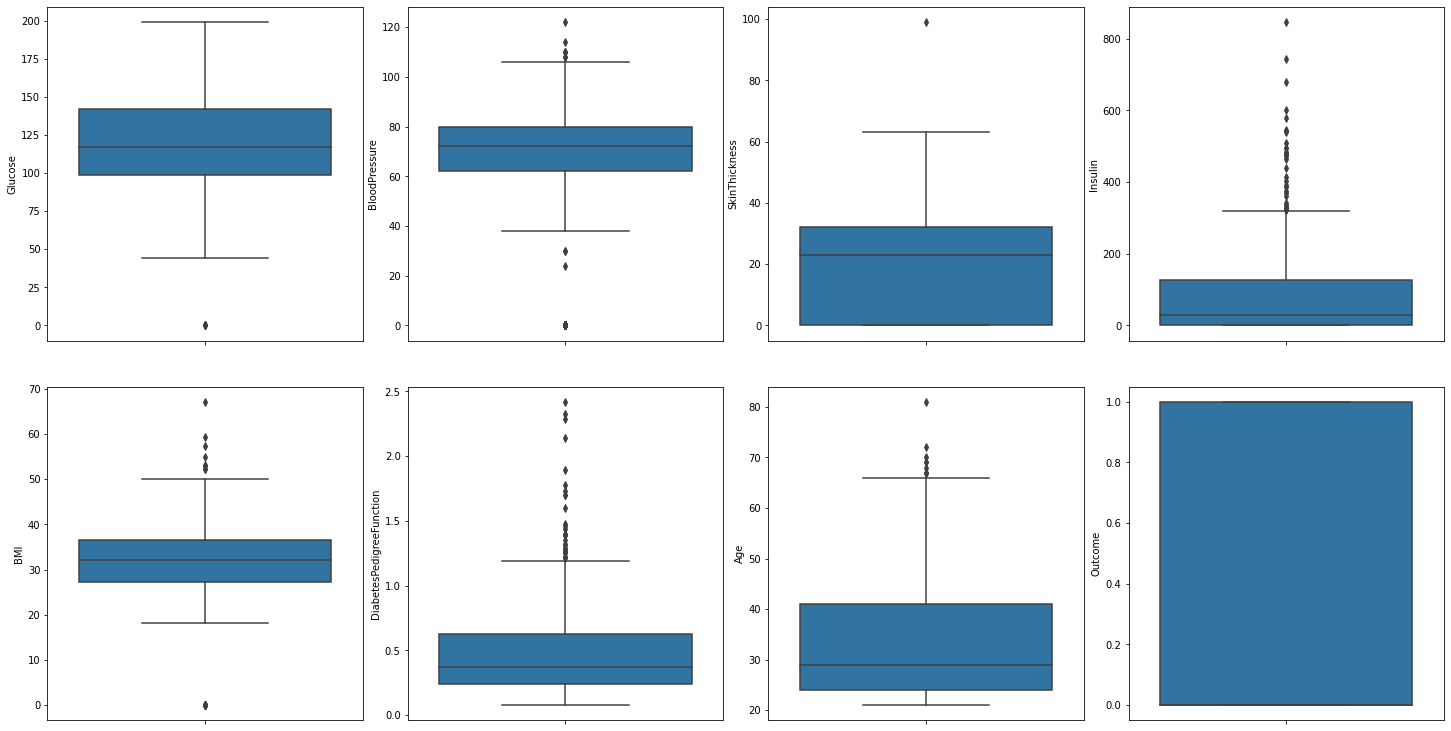

In [9]:
fig, axs = plt.subplots(ncols = 4 ,nrows = 2, figsize = (20,10))
index = 0
axs = axs.flatten()
for c,r in df.items():
    sns.boxplot(y = c , data = df ,ax = axs[index])
    index +=1


plt.tight_layout(pad = 0.16 ,w_pad=0.5 ,h_pad=4.0)

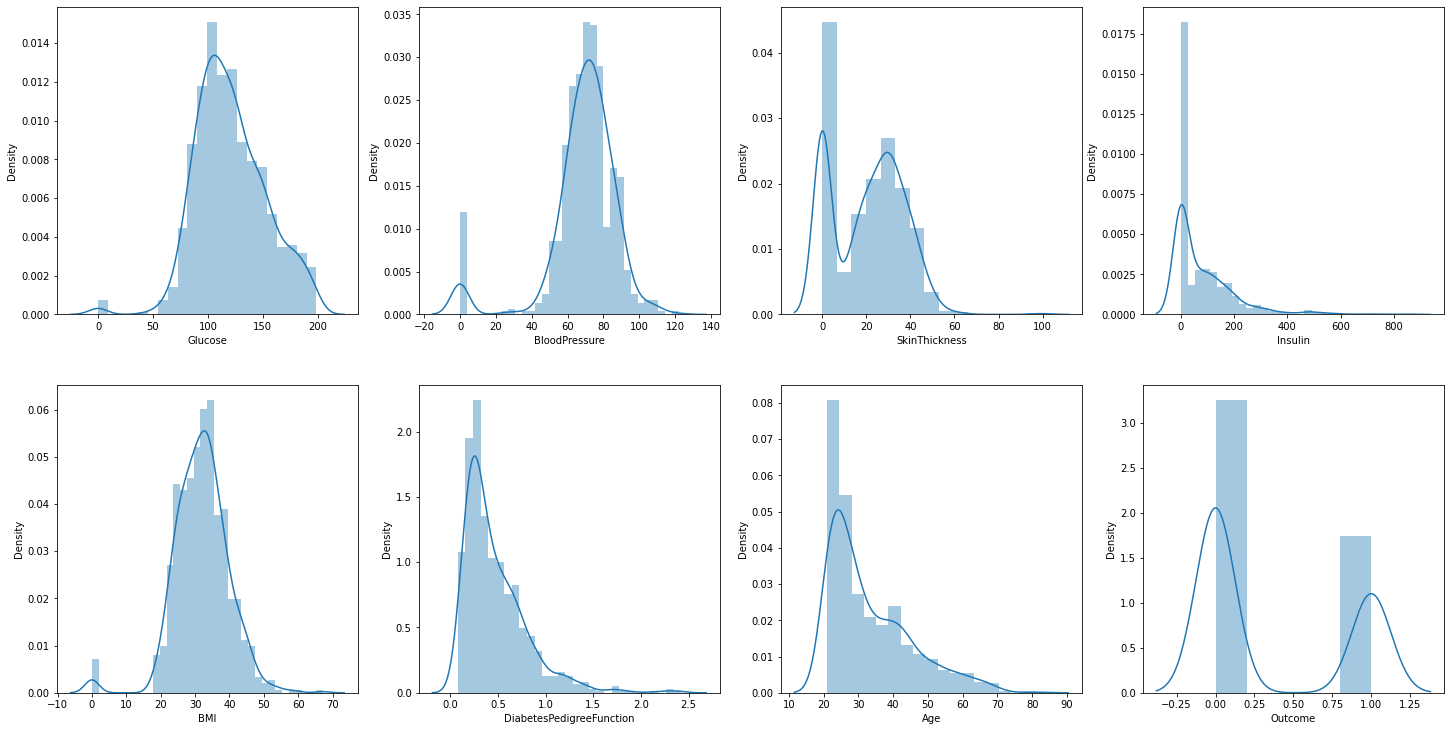

In [10]:
fig, axs = plt.subplots(ncols = 4 ,nrows = 2, figsize = (20,10))
index = 0
axs = axs.flatten()
for c,r in df.items():
    sns.distplot(r  ,ax = axs[index])
    index +=1


plt.tight_layout(pad = 0.16 ,w_pad=0.5 ,h_pad=4.0)

In [11]:
# ?no-multicolinarity
x = df.drop('Outcome',axis = 1)
# vif =[]
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x,i)
    print(f'VIF for {x.columns[i]} :',round(vif,3))
    

VIF for Glucose : 16.515
VIF for BloodPressure : 14.556
VIF for SkinThickness : 4.004
VIF for Insulin : 2.036
VIF for BMI : 18.439
VIF for DiabetesPedigreeFunction : 3.187
VIF for Age : 9.97


<AxesSubplot: >

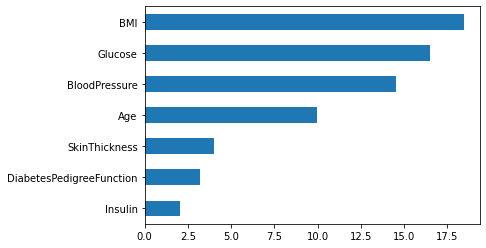

In [35]:
x = df.drop('Outcome',axis = 1)
vif_list =[]
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x,i)
#     print(f'VIF for {x.columns[i]} :',round(vif,3))
    vif_list.append(round(vif,3))
vif_list
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind= 'barh')

In [36]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [37]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=10 , stratify= y)

In [38]:
x_train

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
332      180              0              0        0  43.3   
111      155             62             26      495  34.0   
64       114             66              0        0  32.8   
742      109             58             18      116  28.5   
101      151             60              0        0  26.1   
..       ...            ...            ...      ...   ...   
735       95             60             32        0  35.4   
475      137             84             27        0  27.3   
46       146             56              0        0  29.7   
767       93             70             31        0  30.4   
709       93             64             32      160  38.0   

     DiabetesPedigreeFunction  Age  
332                     0.282   41  
111                     0.543   46  
64                      0.258   42  
742                     0.219   22  
101                     0.179   22  
..                        ...  ...  
735                     0.284   28  
475                     0.231   59  
46                      0.564   29  
767                     0.315   23  
709                     0.674   23  

[614 rows x 7 columns]

In [39]:
x_test


Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
194       85             55             20        0  24.4   
350       92             80              0        0  42.2   
738       99             60             17      160  36.6   
629       94             65             22        0  24.7   
6        150             50             32       88  31.0   
..       ...            ...            ...      ...   ...   
486      139             62             41      480  40.7   
339      178             84              0        0  39.9   
457       86             68             28       71  30.2   
504       96             78             39        0  37.3   
623       94             70             27      115  43.5   

     DiabetesPedigreeFunction  Age  
194                     0.136   42  
350                     0.237   29  
738                     0.453   21  
629                     0.148   21  
6                       0.248   26  
..                        ...  ...  
486                     0.536   21  
339                     0.331   41  
457                     0.364   24  
504                     0.238   40  
623                     0.347   21  

[154 rows x 7 columns]

In [40]:
y_train


332    1
111    1
64     1
742    0
101    0
      ..
735    0
475    0
46     0
767    0
709    1
Name: Outcome, Length: 614, dtype: int64

In [41]:
class Evaluation():
    def __init__(self,model):
        self.model = model
        
    def train(self,x_train,y_train):
        y_train_pred = self.model.predict(x_train)
        print(f"accuracy for training dataset:",{accuracy_score(y_train,y_train_pred)})
        print(classification_report(y_train,y_train_pred))
        cm = confusion_matrix(y_train,y_train_pred)
        ConfusionMatrixDisplay(cm).plot()
        
    def test(self,x_test,y_test):
        y_test_pred = self.model.predict(x_test)
        print(f"accuracy for testing dataset:",{accuracy_score(y_test,y_test_pred)})
        print(classification_report(y_test,y_test_pred))
        cm = confusion_matrix(y_test,y_test_pred)
        ConfusionMatrixDisplay(cm).plot()
        


In [42]:
logstics_model = LogisticRegression()
logstics_model.fit(x_train,y_train)

LogisticRegression()

In [43]:
logistics_evaluation = Evaluation(logstics_model)

accuracy for training dataset: {0.7671009771986971}
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       400
           1       0.71      0.57      0.63       214

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



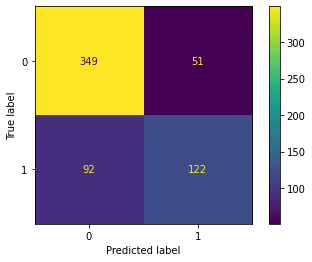

In [44]:
logistics_evaluation.train(x_train,y_train)

accuracy for training dataset: {0.8181818181818182}
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       100
           1       0.78      0.67      0.72        54

    accuracy                           0.82       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.82      0.82      0.81       154



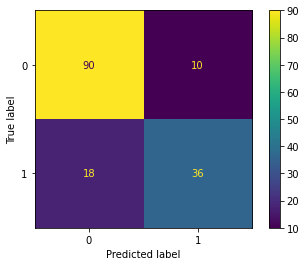

In [45]:
logistics_evaluation.train(x_test,y_test)

## ROC Curve

In [46]:
y_pred_train_prob = logstics_model.predict_proba(x_train)
y_pred_train_prob.shape

(614, 2)

In [47]:
y_pred_train_prob[:,1].shape

(614,)

In [48]:
FPR,TPR,thresh = roc_curve(y_train,y_pred_train_prob[:,1])
thresh.shape

(207,)

In [49]:
np.where(thresh >= 0.5)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86], dtype=int64),)

Text(0.5, 1.0, 'ROC Curve')

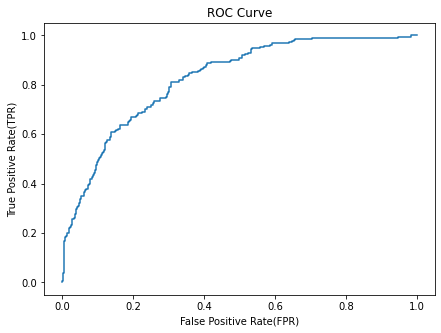

In [50]:
plt.figure(figsize=(7,5))
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')

In [51]:
index = np.where(TPR >= 0.95)[0]
index

array([185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206], dtype=int64)

In [52]:
TPR[index]

array([0.95327103, 0.95327103, 0.95794393, 0.95794393, 0.96261682,
       0.96261682, 0.96728972, 0.96728972, 0.97196262, 0.97196262,
       0.97663551, 0.97663551, 0.98130841, 0.98130841, 0.98598131,
       0.98598131, 0.99065421, 0.99065421, 0.9953271 , 0.9953271 ,
       1.        , 1.        ])

In [53]:
FPR[index]

array([0.5575, 0.57  , 0.57  , 0.5875, 0.5875, 0.5925, 0.5925, 0.64  ,
       0.64  , 0.6475, 0.6475, 0.6525, 0.6525, 0.6575, 0.6575, 0.705 ,
       0.705 , 0.9475, 0.9475, 0.9825, 0.9825, 1.    ])

In [54]:
thresh[index]

array([0.15638748, 0.15043718, 0.1501755 , 0.14432411, 0.14412611,
       0.14137368, 0.1406562 , 0.12771782, 0.12722588, 0.12678137,
       0.12656409, 0.12571371, 0.12559608, 0.12515388, 0.12368497,
       0.10991678, 0.10957967, 0.04142812, 0.04041317, 0.02183766,
       0.02130626, 0.00249573])

In [55]:
project_data = {'columns': x.columns.tolist()}
project_data

{'columns': ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age']}

In [56]:
with open('project_data.json','w')as f:
    json.dump(project_data,f)

In [57]:
x.head(1)

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             50             35        0  33.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50

In [59]:
Glucose = 130
BloodPressure = 60
SkinThickness = 40
Insulin = 0
BMI = 40
DiabetesPedigreeFunction = 0.599
Age = 45

test_array= np.array([Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age])
       
      
print(test_array)
# test_array = np.zeros(x.shape[1])
# test_array[0] = Glucose
# test_array[1] = BloodPressure
# test_array[2] = SkinThickness
# test_array[3] = Insulin
# test_array[4] = BMI
# test_array[5] = DiabetesPedigreeFunction
# test_array[6] = Age 
# print(test_array)
pred_Class = logstics_model.predict([test_array])[0]
print('predicted class:',pred_Class)



[130.     60.     40.      0.     40.      0.599  45.   ]
predicted class: 1


In [60]:
with open('diabetes.pkl','wb') as f:
    pickle.dump(logstics_model,f)